# HS Hya
A changing-inclination binary! The previous prediction was that eclipses should [cease in 2022](https://ui.adsabs.harvard.edu/abs/2012A%26A...542L..23Z/abstract), which we'll be able to verify in TESS Sector 035 in [early 2021](https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=HS+Hya).


## Data Sources
(Note, a few of these didn't turn out interesting)
- [Gyldenkerne+1975](#Gyldenkerne+1975)
- [ASAS-SN](#ASAS-SN)
- [Hipparcos](#Hipparcos)
- [WISE](#WISE)
- [DASCH](#DASCH)
- [ASAS](#ASAS)
- [TESS](#TESS)

## Combined Plots
[Putting it all together](#Putting-it-all-together)


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import curve_fit

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
Per = 1.568024
E0 = 2441374.5934
BJD0_tess = 2457000.

def gaus(x, a, b, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + b

## Gyldenkerne+1975

some exquisite narrow-band $ubvy$ photometry 

In [4]:
# helpfully digitized and made available here:
# http://caleb.eastern.edu/original_data_display.php?model_id=294
g75_file = 'Gyldenkerne1975.txt'

g75 = pd.read_table(g75_file, comment='#', delim_whitespace=True)

In [5]:
ubvy = (g75['d(u)'] + g75['d(b)'] + g75['d(v)'] + g75['d(y)']) / 4.

Text(0.5, 1.0, 'Gyldenkerne+1975')

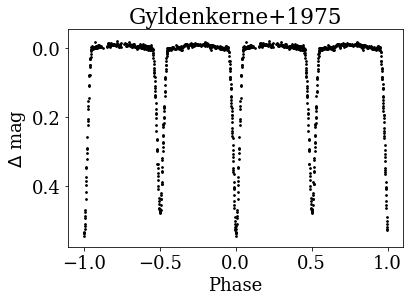

In [6]:
plt.scatter(((g75['dd'] + g75['dm'] + 2440000 - E0) % Per) / Per,  ubvy - np.nanmedian(ubvy), s=3, c='k')
plt.scatter(((g75['dd'] + g75['dm'] + 2440000 - E0) % Per) / Per - 1,  ubvy - np.nanmedian(ubvy), s=3, c='k')
plt.gca().invert_yaxis()
plt.xlabel('Phase')
plt.ylabel('$\Delta$ mag')
plt.title('Gyldenkerne+1975')

[ 0.5333433  -0.00558888  0.0012955   0.01897064]


Text(0.5, 1.0, 'Gyldenkerne+1975')

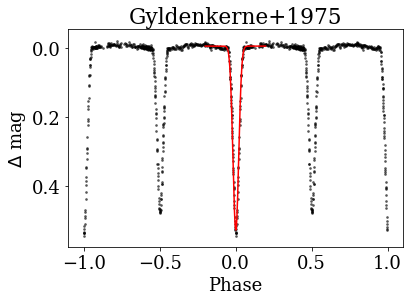

In [7]:
p0 = [0.5, 0., 0.01, 0.05]

xdata = np.hstack((((g75['dd'] + g75['dm'] + 2440000 - E0) % Per) / Per, 
                   ((g75['dd'] + g75['dm'] + 2440000 - E0) % Per) / Per - 1))
ydata = np.hstack((ubvy - np.nanmedian(ubvy), ubvy - np.nanmedian(ubvy)))

xr = np.where((xdata > -0.2) & (xdata < 0.2))[0]
xr = xr[np.argsort(xdata[xr])]
fit, cov = curve_fit(gaus, xdata[xr], ydata[xr], p0=p0)
print(fit)
fit_g75 = fit
err_g75 = np.sqrt(np.diag(cov))

plt.scatter(xdata, ydata, s=3, c='k', alpha=0.5)
plt.plot(xdata[xr], gaus(xdata[xr], *fit), c='r')
plt.gca().invert_yaxis()
plt.xlabel('Phase')
plt.ylabel('$\Delta$ mag')
plt.title('Gyldenkerne+1975')

## ASAS-SN

In [8]:
asassn = pd.read_csv('221524.csv')
# asassn

# this was the lightcurve that was pre-computed on their website

Text(0, 0.5, '$\\Delta$V (mag)')

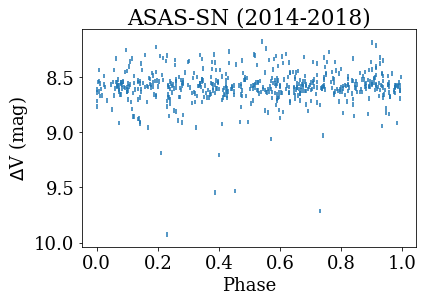

In [9]:
plt.errorbar(((asassn['hjd'].values - E0) % Per)/Per, asassn['mag'], 
             yerr=asassn['mag err'], linestyle='none')
plt.gca().invert_yaxis()
# plt.ylim(0.5, -0.2)
plt.title('ASAS-SN (2014-2018)')
plt.xlabel('Phase')
plt.ylabel('$\Delta$V (mag)')

In [10]:
# let's force their website to do photometry further back...
asassn2 = pd.read_csv('asassn2.csv')
# asassn2

In [11]:
# asassn2['HJD'][a2ok].values.min()

In [12]:
# a2ok = (asassn2['mag_err'] < 0.01) & (asassn2['Filter'] == 'g')

# plt.errorbar(((asassn2['HJD'][a2ok] - E0) % Per)/Per, asassn2['mag'][a2ok], 
#              yerr=asassn2['mag_err'][a2ok], linestyle='none')
# plt.gca().invert_yaxis()
# # plt.ylim(0.5, -0.2)
# # plt.title('ASAS-SN (2014-2018)')
# plt.xlabel('Phase')
# plt.ylabel('$\Delta$V (mag)')

## Hipparcos
So awesome

In [13]:
# Hipparcos light curve data (HIP 50966)
# http://cdsarc.u-strasbg.fr/viz-bin/nph-Plot/Vgraph/htm?I/239/50966&6069-1131-1
hip = pd.read_table('hipdata.txt', delimiter='|')
hip.columns

Index(['JD-2440000', ' Hpmag ', 's.e. ', 'Tflg'], dtype='object')

Text(0.5, 1.0, 'Hipparcos')

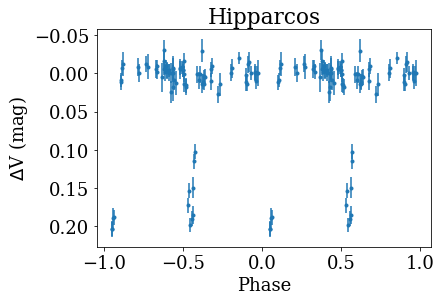

In [14]:
hok = hip['Tflg'] == 0
plt.errorbar(((hip['JD-2440000'][hok]+2440000 - E0) % Per) / Per, 
             hip[' Hpmag '][hok] - np.nanmedian(hip[' Hpmag '][hok]), yerr=hip['s.e. '][hok], 
             linestyle='None', marker='.', color='C0')
plt.errorbar(((hip['JD-2440000'][hok]+2440000 - E0) % Per) / Per - 1, 
             hip[' Hpmag '][hok] - np.nanmedian(hip[' Hpmag '][hok]), yerr=hip['s.e. '][hok], 
             linestyle='None', marker='.', color='C0')

plt.gca().invert_yaxis()
plt.xlabel('Phase')
plt.ylabel('$\Delta$V (mag)')
plt.title('Hipparcos')

[ 0.20467056 -0.00107575  0.04981382  0.02181029]


Text(0.5, 1.0, 'Hipparcos')

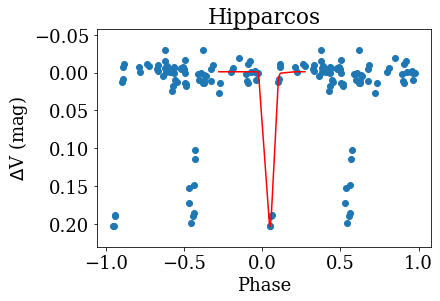

In [15]:
p0 = [0.2, 0., 0.01, 0.05]

xdata = np.hstack((((hip['JD-2440000'][hok]+2440000 - E0) % Per) / Per, 
                   ((hip['JD-2440000'][hok]+2440000 - E0) % Per) / Per - 1))
ydata = np.hstack((hip[' Hpmag '][hok] - np.nanmedian(hip[' Hpmag '][hok]), hip[' Hpmag '][hok] - np.nanmedian(hip[' Hpmag '][hok])))

xr = np.where((xdata > -0.3) & (xdata < 0.3))[0]
xr = xr[np.argsort(xdata[xr])]
fit, cov = curve_fit(gaus, xdata[xr], ydata[xr], p0=p0)
print(fit)
fit_hip = fit
err_hip = np.sqrt(np.diag(cov))

plt.scatter(xdata, ydata, color='C0')
plt.plot(xdata[xr], gaus(xdata[xr], *fit), c='r')
plt.gca().invert_yaxis()
plt.xlabel('Phase')
plt.ylabel('$\Delta$V (mag)')
plt.title('Hipparcos')

## WISE
journey to the infrared!

In [16]:
# WISE

neowise = pd.read_csv('HS Hyaneowiser_p1bs_psd.csv')
wise4 = pd.read_csv('HS Hyaallsky_4band_p1bs_psd.csv')
wise2 = pd.read_csv('HS Hyaallsky_2band_p1bs_psd.csv')

wise_mjd = np.hstack( (wise4['mjd'], wise2['mjd'], neowise['mjd']))
wise_w1 =  np.hstack( (wise4['w1mpro'], wise2['w1mpro'], neowise['w1mpro']))
wise_w2 =  np.hstack( (wise4['w2mpro'], wise2['w2mpro'], neowise['w2mpro']))
wise_w1e =  np.hstack( (wise4['w1sigmpro'], wise2['w1sigmpro'], neowise['w1sigmpro']))
wise_w2e =  np.hstack( (wise4['w2sigmpro'], wise2['w2sigmpro'], neowise['w2sigmpro']))
wise_ph_qual = np.hstack( (wise4['ph_qual'].str[0:2], wise2['ph_qual'].str['0:2'], neowise['ph_qual'].str[0:2]))

(0.1, -0.1)

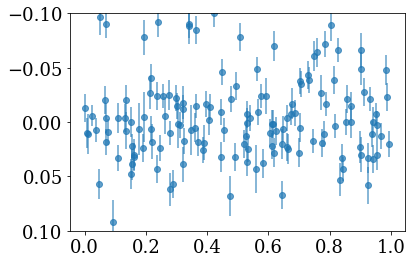

In [17]:
wgd = np.where((wise_ph_qual == 'AA'))[0]

# saturated in W1
# plt.errorbar(((wise_mjd[wgd] + 2400000.5 - E0) % Per) / Per, wise_w1[wgd], 
#              yerr= wise_w1e[wgd], linestyle='none', marker='o', alpha=0.7)

# JUST below saturation in W2... data kinda garbage?
plt.errorbar(((wise_mjd[wgd] + 2400000.5 - E0) % Per) / Per, wise_w2[wgd] - np.nanmedian(wise_w2[wgd]), 
             yerr= wise_w2e[wgd], linestyle='none', marker='o', alpha=0.7, c='C0')

# plt.scatter(((asas['HJD'][aok] + 2450000 - E0) % Per)/Per, asas['MAG_4'][aok] - np.nanmedian(asas['MAG_4'][aok]),
#             s=3, c='C5', alpha=0.4)

plt.gca().invert_yaxis()

plt.ylim(0.1, -0.1)


(0.11, -0.1)

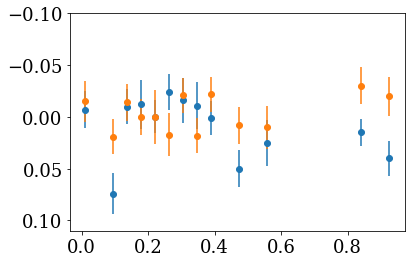

In [18]:
plt.errorbar(((wise4['mjd'].values + 2400000.5 - E0) % Per)/Per, wise4['w2mpro'] - np.nanmedian(wise4['w2mpro']), 
             yerr=wise4['w2sigmpro'], linestyle='none', marker='o')

plt.errorbar(((wise4['mjd'].values + 2400000.5 - E0) % Per)/Per, wise4['w3mpro'] - np.nanmedian(wise4['w3mpro']), 
             yerr=wise4['w3sigmpro'], linestyle='none', marker='o')

# plt.scatter(((asas['HJD'][aok] + 2450000 - E0) % Per)/Per, asas['MAG_4'][aok] - np.nanmedian(asas['MAG_4'][aok]),
#             s=3, c='C5', alpha=0.4)

plt.gca().invert_yaxis()
plt.ylim(0.11, -0.1)

In [19]:
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel, Trapezoid1DKernel

## DASCH
if astronomy had a time machine...

HS Hya from [DASCH](http://dasch.rc.fas.harvard.edu/lightcurve_frame.php?coo=HS+Hya&nmin=1&box=5&source=atlas&frameformat=frame&submit=Search)

In [20]:
# DASCH archive!
dnames = ('Date', 'year', 'magcal_magdep', 'magcal_local_rms', 'limiting_mag_local', 
          'ra', 'dec', 'THETA_J2000', 'ELLIPTICITY', 'Plate', 'versionId', 'AFLAGS', 
          'BFLAGS', 'NUMBER', 'quality', 'timeAccuracy', 'AFLAGSBits', 'BFLAGSBits', 'qualitybits')

dasch = pd.read_table('plotshort_ATLAS2_551047062.txt', delim_whitespace=True, names=dnames, skiprows=7)
dasch.columns

Index(['Date', 'year', 'magcal_magdep', 'magcal_local_rms',
       'limiting_mag_local', 'ra', 'dec', 'THETA_J2000', 'ELLIPTICITY',
       'Plate', 'versionId', 'AFLAGS', 'BFLAGS', 'NUMBER', 'quality',
       'timeAccuracy', 'AFLAGSBits', 'BFLAGSBits', 'qualitybits'],
      dtype='object')

1390


(9, 7.5)

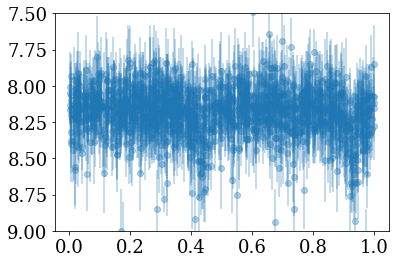

In [21]:
dbest = (dasch['magcal_local_rms'] < 0.3)
print(sum(dbest))
plt.errorbar(((dasch['Date'][dbest] - E0) % Per)/Per, dasch['magcal_magdep'][dbest], 
             yerr=dasch['magcal_local_rms'][dbest], 
             alpha=0.35, linestyle='none', marker='o')
plt.gca().invert_yaxis()
plt.ylim(9, 7.5)

(9, 7.5)

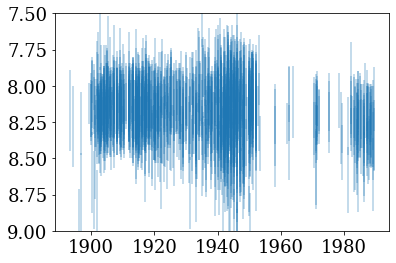

In [22]:
plt.errorbar(dasch['year'][dbest], dasch['magcal_magdep'][dbest], 
             yerr=dasch['magcal_local_rms'][dbest], 
             alpha=0.35, linestyle='none')
plt.gca().invert_yaxis()
plt.ylim(9, 7.5)

(9, 7.5)

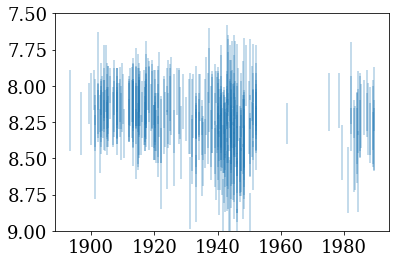

In [23]:
dphz = ((dasch['Date'][dbest] - E0) % Per)/Per
ecl = np.where(((dphz >= 0.4) & (dphz <= 0.55)) | 
               ((dphz >= 0.85) & (dphz <= 1)))[0]

plt.errorbar(dasch['year'].values[dbest][ecl], dasch['magcal_magdep'].values[dbest][ecl], 
             yerr=dasch['magcal_local_rms'].values[dbest][ecl], 
             alpha=0.35, linestyle='none')
plt.gca().invert_yaxis()
plt.ylim(9, 7.5)

1905.0391780000002
1916.9793280000001
1933.304354
1941.2346189999998
1943.984606
1948.089908
1984.3044


Text(0, 0.5, 'V (mag)')

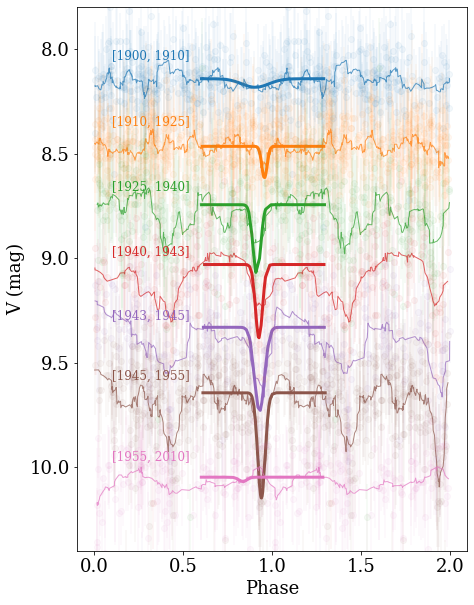

In [24]:
plt.figure(figsize=(7,10))
trange = [[1900,1910],
          [1910,1925],
          [1925,1940],
          [1940,1943],
          [1943,1945],
          [1945,1955],
          [1955,2010]]

offset = 0.
doff = 0.3
ksize=15
fit_dasch = np.array([0,0,0,0])
err_dasch = np.array([0,0,0,0])
time_dasch = np.array([])

for k in range(len(trange)):
    Hok = np.where((dasch['year'][dbest] >= trange[k][0]) & (dasch['year'][dbest] < trange[k][1]))[0]
    ss = np.argsort((dasch['Date'].values[dbest][Hok] - E0) % Per)
    
    xdata = np.hstack((((dasch['Date'].values[dbest][Hok[ss]] - E0) % Per)/Per, 
                       ((dasch['Date'].values[dbest][Hok][ss] - E0) % Per)/Per+1))
    ydata = np.hstack((dasch['magcal_magdep'].values[dbest][Hok][ss],
                       dasch['magcal_magdep'].values[dbest][Hok][ss]))
    edata = np.hstack((dasch['magcal_local_rms'].values[dbest][Hok][ss], 
                       dasch['magcal_local_rms'].values[dbest][Hok][ss]))
    plt.errorbar(xdata, ydata + offset, yerr=edata, 
                 alpha=0.05, linestyle='none', marker='o', label=str(k), color='C'+str(k))

    smo = convolve(ydata, Box1DKernel(ksize), boundary='extend')
    plt.plot(xdata, smo + offset, lw=1, c='C'+str(k), alpha=0.7)

    plt.text(0.1, np.nanmedian(smo) + offset - 0.1, str(trange[k]), color='C'+str(k), fontsize=12 )

    
    xr = np.where((xdata > 0.6) & (xdata < 1.3) & np.isfinite(ydata))[0]
    p0 = [0.1, np.nanmedian(ydata), 0.9, 0.05]
    bnds = [(0., 8., 0.7, 0.015), (1.5, 8.5, 1.2, 0.2)]
    fit, cov = curve_fit(gaus, xdata[xr], ydata[xr], p0=p0, bounds=bnds, sigma=edata[xr], absolute_sigma=True)
    
    fit_dasch = np.vstack((fit_dasch, fit))
    err_dasch = np.vstack((err_dasch, np.sqrt(np.diag(cov))))
    time_dasch = np.append(time_dasch, np.nanmedian(dasch['Date'].values[dbest][Hok[ss]] - BJD0_tess))

    print(np.nanmedian(dasch['year'].values[dbest][Hok]))
    plt.plot(xdata[xr], gaus(xdata[xr], *fit) + offset, c='C'+str(k), lw=3)
    
    offset += doff
    
fit_dasch = fit_dasch[1:]
err_dasch = err_dasch[1:]
plt.gca().invert_yaxis()
plt.ylim(10.4, 7.8)
plt.xlabel('Phase')
plt.ylabel('V (mag)')

In [25]:
err_dasch

array([[0.05490941, 0.02037637, 0.09974078, 0.12106098],
       [0.0831438 , 0.01336374, 0.00788147, 0.00859104],
       [0.12583961, 0.01724535, 0.00858032, 0.00757792],
       [0.10651767, 0.02514217, 0.00770327, 0.00765901],
       [0.1289791 , 0.02504821, 0.0090089 , 0.0083138 ],
       [0.07363019, 0.0162047 , 0.00424409, 0.003956  ],
       [0.16050882, 0.02177228, 0.13782504, 0.15679087]])

## ASAS

In [26]:
asas = pd.read_table('asas3.txt', delim_whitespace=True)
asas.columns

Index(['HJD', 'MAG_4', 'MAG_0', 'MAG_1', 'MAG_2', 'MAG_3', 'MER_4', 'MER_0',
       'MER_1', 'MER_2', 'MER_3', 'GRADE', 'FRAME'],
      dtype='object')

662


(8.3, 7.9)

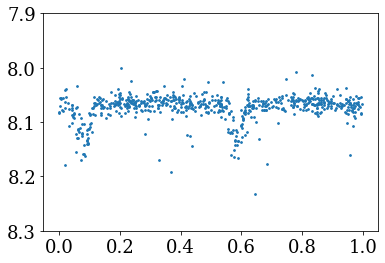

In [27]:
aok = asas['GRADE'] == 'A'
print(sum(aok))

plt.scatter(((asas['HJD'][aok] + 2450000 - E0) % Per)/Per, asas['MAG_4'][aok], s=3)
plt.ylim(8.3, 7.9)

(8.2, 8)

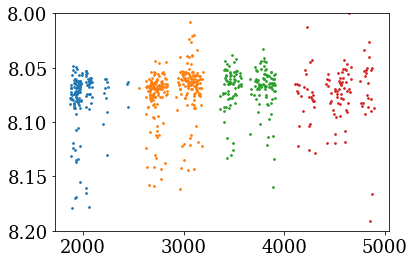

In [28]:
a1 = (asas['GRADE'] == 'A') & (asas['HJD'] < 2500)
a2 = (asas['GRADE'] == 'A') & (asas['HJD'] > 2500) & (asas['HJD'] < 3200)
a3 = (asas['GRADE'] == 'A') & (asas['HJD'] > 3200) & (asas['HJD'] < 4000)
a4 = (asas['GRADE'] == 'A') & (asas['HJD'] > 4000)

plt.scatter(asas['HJD'][a1], asas['MAG_4'][a1], s=3)
plt.scatter(asas['HJD'][a2], asas['MAG_4'][a2], s=3)
plt.scatter(asas['HJD'][a3], asas['MAG_4'][a3], s=3)
plt.scatter(asas['HJD'][a4], asas['MAG_4'][a4], s=3)
plt.ylim(8.2,8)

Text(0, 0.5, 'V (mag)')

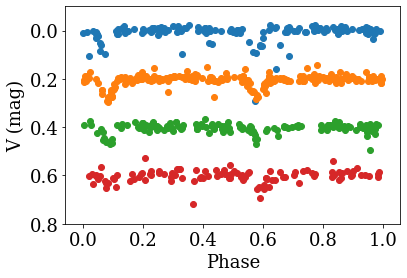

In [29]:
plt.scatter(((asas['HJD'][a1] + 2450000 - E0) % Per)/Per, asas['MAG_4'][a1] - np.nanmedian(asas['MAG_4'][a1]))
plt.scatter(((asas['HJD'][a2] + 2450000 - E0) % Per)/Per, asas['MAG_4'][a2] - np.nanmedian(asas['MAG_4'][a2])+.2)
plt.scatter(((asas['HJD'][a3] + 2450000 - E0) % Per)/Per, asas['MAG_4'][a3] - np.nanmedian(asas['MAG_4'][a3])+.4)
plt.scatter(((asas['HJD'][a4] + 2450000 - E0) % Per)/Per, asas['MAG_4'][a4] - np.nanmedian(asas['MAG_4'][a4])+.6)
plt.ylim(.8, -0.1)
plt.xlabel('Phase')
plt.ylabel('V (mag)')

[ 0.09808956 -0.00092575  0.07258907  0.01663491]
[ 0.09161375 -0.00236057  0.08031871  0.01666872]
[ 0.0755166  -0.00107478  0.08357534  0.01429624]
[ 0.03264154 -0.00708179  0.10020481  0.04287241]


Text(0, 0.5, 'V (mag)')

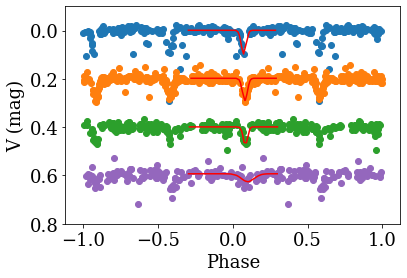

In [30]:
p0 = [0.1, 0., 0.1, 0.05]

##
xdata = np.hstack((((asas['HJD'][a1] + 2450000 - E0) % Per)/Per, 
                   ((asas['HJD'][a1] + 2450000 - E0) % Per)/Per - 1))
ydata = np.hstack((asas['MAG_4'][a1] - np.nanmedian(asas['MAG_4'][a1]), 
                   asas['MAG_4'][a1] - np.nanmedian(asas['MAG_4'][a1])))
xr = np.where((xdata > -0.3) & (xdata < 0.3))[0]
xr = xr[np.argsort(xdata[xr])]
fit, cov = curve_fit(gaus, xdata[xr], ydata[xr], p0=p0)
print(fit)
fit_a1 = fit
err_a1 = np.sqrt(np.diag(cov))

plt.scatter(xdata, ydata)
plt.plot(xdata[xr], gaus(xdata[xr], *fit), c='r')

##
xdata = np.hstack((((asas['HJD'][a2] + 2450000 - E0) % Per)/Per, 
                   ((asas['HJD'][a2] + 2450000 - E0) % Per)/Per - 1))
ydata = np.hstack((asas['MAG_4'][a2] - np.nanmedian(asas['MAG_4'][a2]), 
                   asas['MAG_4'][a2] - np.nanmedian(asas['MAG_4'][a2])))
xr = np.where((xdata > -0.3) & (xdata < 0.3))[0]
xr = xr[np.argsort(xdata[xr])]
fit, cov = curve_fit(gaus, xdata[xr], ydata[xr], p0=p0)
print(fit)
fit_a2 = fit
err_a2 = np.sqrt(np.diag(cov))


plt.scatter(xdata, ydata + 0.2)
plt.plot(xdata[xr], gaus(xdata[xr], *fit)+0.2, c='r')

##
xdata = np.hstack((((asas['HJD'][a3] + 2450000 - E0) % Per)/Per, 
                   ((asas['HJD'][a3] + 2450000 - E0) % Per)/Per - 1))
ydata = np.hstack((asas['MAG_4'][a3] - np.nanmedian(asas['MAG_4'][a3]), 
                   asas['MAG_4'][a3] - np.nanmedian(asas['MAG_4'][a3])))
xr = np.where((xdata > -0.3) & (xdata < 0.3) & (ydata < 0.2))[0]
xr = xr[np.argsort(xdata[xr])]
fit, cov = curve_fit(gaus, xdata[xr], ydata[xr], p0=p0)
print(fit)
fit_a3 = fit
err_a3 = np.sqrt(np.diag(cov))


plt.scatter(xdata, ydata + 0.4)
plt.plot(xdata[xr], gaus(xdata[xr], *fit)+0.4, c='r')

##
xdata = np.hstack((((asas['HJD'][a4] + 2450000 - E0) % Per)/Per, 
                   ((asas['HJD'][a4] + 2450000 - E0) % Per)/Per - 1))
ydata = np.hstack((asas['MAG_4'][a4] - np.nanmedian(asas['MAG_4'][a4]), 
                   asas['MAG_4'][a4] - np.nanmedian(asas['MAG_4'][a4])))
xr = np.where((xdata > -0.3) & (xdata < 0.3))[0]
xr = xr[np.argsort(xdata[xr])]
fit, cov = curve_fit(gaus, xdata[xr], ydata[xr], p0=p0)
print(fit)
fit_a4 = fit
err_a4 = np.sqrt(np.diag(cov))


plt.scatter(xdata, ydata+0.6, c='C4')
plt.plot(xdata[xr], gaus(xdata[xr], *fit)+0.6, c='r')

plt.ylim(.8, -0.1)
plt.xlabel('Phase')
plt.ylabel('V (mag)')

## TESS
The FUTURE... and also the final eclipses for this system.

In [31]:
tess_tbl = Table.read('tess2019058134432-s0009-0000000434479378-0139-s_lc.fits', format='fits')
df = tess_tbl.to_pandas()

Text(0.5, 1.0, 'TESS Sector 009')

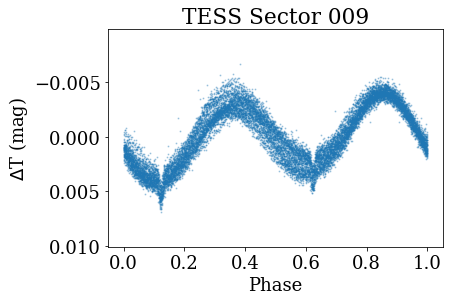

In [32]:
Tmag = -2.5*np.log10(df['PDCSAP_FLUX'])

plt.scatter(((df['TIME']+BJD0_tess-E0) % Per)/Per, Tmag - np.nanmedian(Tmag), s=1, alpha=0.3)
plt.gca().invert_yaxis()
plt.xlabel('Phase')
plt.ylabel('$\Delta$T (mag)')
plt.title('TESS Sector 009')

[0.00173241 0.00369946 0.19064015 0.00930672]


(0.15, 0.25)

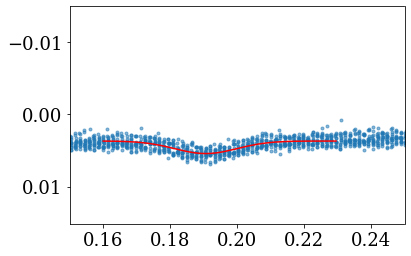

In [33]:
p0 = [0.001, 0., 0.1, 0.05]

##
xdata = (df['TIME']+BJD0_tess-E0) % Per
ydata = Tmag - np.nanmedian(Tmag)

xr = np.where((xdata > 0.16) & (xdata < 0.23) & np.isfinite(ydata))[0]
xr = xr[np.argsort(xdata[xr])]
fit, cov = curve_fit(gaus, xdata[xr], ydata[xr], p0=p0)
print(fit)
fit_tess = fit
err_tess = np.sqrt(np.diag(cov))


plt.scatter(xdata, ydata,s=9, alpha=0.53)
plt.plot(xdata[xr], gaus(xdata[xr], *fit), c='r')

# plt.scatter((df['TIME']+BJD0_tess-E0) % Per, Tmag - np.nanmedian(Tmag)-0.004)
plt.gca().invert_yaxis()
plt.xlim(0.15,0.25)
# plt.ylim(0.003,-0.003)

## Putting it all together

In [34]:
times = [np.nanmedian(g75['dd'] + g75['dm'] + 2440000 - BJD0_tess), 
         np.nanmedian(hip['JD-2440000'][hok]+2440000 - BJD0_tess),
         np.nanmedian(asas['HJD'][a1] + 2450000 - BJD0_tess),
         np.nanmedian(asas['HJD'][a2] + 2450000 - BJD0_tess),
         np.nanmedian(asas['HJD'][a3] + 2450000 - BJD0_tess),
         np.nanmedian(asas['HJD'][a4] + 2450000 - BJD0_tess),
         np.nanmedian(df['TIME'])
        ]
times = np.array(times)
times = np.append(times, time_dasch[0:-1]) # add DASCH, ditch the first & last time-bin, since not detected

big_data = np.vstack([fit_g75, fit_hip, fit_a1, fit_a2, fit_a3, fit_a4, fit_tess, fit_dasch[0:-1,:]])
big_errs = np.vstack([err_g75, err_hip, err_a1, err_a2, err_a3, err_a4, err_tess, err_dasch[0:-1,:]])

(-0.2, 0.2)

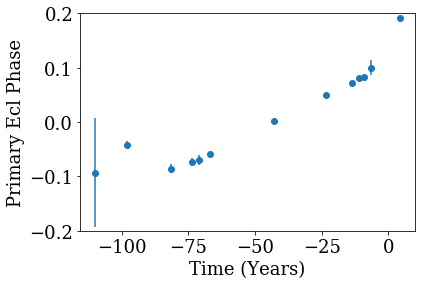

In [35]:
timesy = times/365.24
plt.errorbar(timesy, big_data[:,2], yerr=big_errs[:,2], marker='o', linestyle='None', color='C0')
plt.errorbar(timesy, big_data[:,2]-1, yerr=big_errs[:,2], marker='o', linestyle='None', color='C0')
# plt.scatter(timesy, big_data[:,2], s=100, alpha=0.5, c='C0')
# plt.scatter(timesy, big_data[:,2]-1, s=100, alpha=0.5, c='C0')
plt.xlabel('Time (Years)')
plt.ylabel('Primary Ecl Phase')
plt.ylim(-.2,0.2)

Text(0, 0.5, 'Primary Ecl Width (Days)')

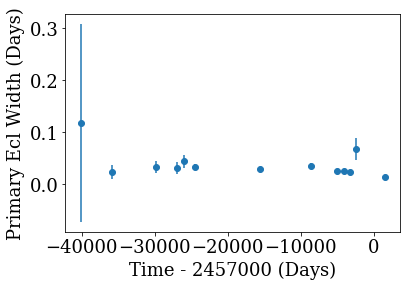

In [36]:
plt.errorbar(times, big_data[:,3]*Per, yerr=big_errs[:,3]*Per, marker='o', linestyle='None')
plt.xlabel('Time - 2457000 (Days)')
plt.ylabel('Primary Ecl Width (Days)')

Text(0, 0.5, 'Primary Ecl Depth (mag)')

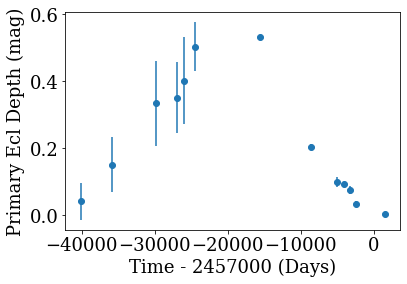

In [40]:
plt.errorbar(times, big_data[:,0], yerr=big_errs[:,0], marker='o', linestyle='None')

# ff = np.polyfit(times, big_data[:,0],2, w=1./big_errs[:,0])
# plt.plot(np.arange(-16000,2100), np.polyval(ff, np.arange(-16000,2100)))

plt.xlabel('Time - 2457000 (Days)')

plt.ylabel('Primary Ecl Depth (mag)')

Text(0, 0.5, 'Primary Ecl Depth (mag)')

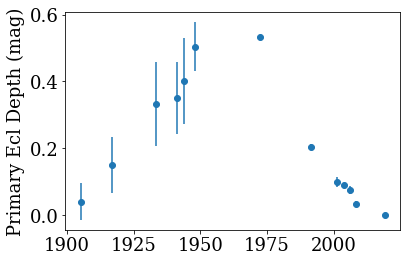

In [38]:
plt.errorbar((times+BJD0_tess - 2455197.50000)/365.24 + 2010, 
             big_data[:,0], yerr=big_errs[:,0], marker='o', linestyle='None')

# plt.plot((np.arange(-16000,2100)+BJD0_tess - 2455197.50000)/365.24 + 2010, 
#          np.polyval(ff, np.arange(-16000,2100)))
plt.ylabel('Primary Ecl Depth (mag)')

[ 6.45923818e-01 -1.81777061e-02  1.95941325e+03  2.26614734e+01]


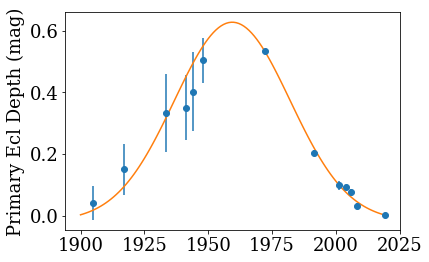

In [44]:
plt.errorbar((times + BJD0_tess - 2455197.50000)/365.24 + 2010, 
             big_data[:,0], yerr=big_errs[:,0], marker='o', linestyle='None')
dfit,_ = curve_fit(gaus,(times+BJD0_tess - 2455197.50000)/365.24 + 2010, 
                   big_data[:,0], p0=[0.6, 0., 1960,25], sigma=big_errs[:,0])

plt.plot(np.arange(1900,2020,1), gaus(np.arange(1900,2020,1), *dfit))
plt.ylabel('Primary Ecl Depth (mag)')

print(dfit)